In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.filepaths.filepaths import (
    FILE_PATH_CASE_102,
    FILE_PATH_CASE_102_HFM_T,
    FILE_PATH_CASE_102_HFM_T_OBS,
    FILE_PATH_CASE_102_HFM_Z,
    FILE_PATH_DRILLING_REPORT_LABELED_CASE_102,
)

from utils.utils.utils import (
    get_active_drilling_data,
    reading_labeled_drill_report_data,
    extracting_labeled_data_from_dataframe,
    plot_sections,
)

sns.set_theme()

In [51]:
# Loading files
sensor_data_case_102 = pd.read_pickle(FILE_PATH_CASE_102)
# Extracting the dates to consider
tstamp_min = '2020-08-17 12:00:00+00:00'
tstamp_max = '2020-08-21 13:00:00+00:00'
sensor_data_case_102 = sensor_data_case_102.loc[tstamp_min:tstamp_max]
# First datapoint was removed during pickling of simdata. Have to so the same here
sensor_data_case_102 = sensor_data_case_102.iloc[1:] 
hfm_data_case_102_t = pd.read_pickle(FILE_PATH_CASE_102_HFM_T)
hfm_data_case_102_t_obs = pd.read_pickle(FILE_PATH_CASE_102_HFM_T_OBS)
hfm_data_case_102_z = pd.read_pickle(FILE_PATH_CASE_102_HFM_Z)


In [52]:
# Getting the indices for the model data right
start_date = '2020-08-17 12:00:10+00:00'
date_range = pd.date_range(start = start_date, periods = len(hfm_data_case_102_t), freq='10s')
hfm_data_case_102_t.index = date_range
hfm_data_case_102_t.head()

,Rate_in,SPP,ECD_bot,ECD_shoe,P_choke,FrontFluid2,FrontFluid3,FrontFluid4,FrontFluid5,FrontFluid6,...,cutSt,vDev,pDev,mTotMud,mFreeGas,mDGas,qLoss,mLost,XFactor,DSXFactor
2020-08-17 12:00:10+00:00,514.88,13.625,1.3861,1.3860,1.0132,0.0,0.0,0.0,0.0,0.0,...,-999.25,0.0,0.0,265660.0,0.0,0.0,0.0,0.0,1.05,1.55
2020-08-17 12:00:20+00:00,548.42,14.801,1.3861,1.3861,1.0132,0.0,0.0,0.0,0.0,0.0,...,-999.25,0.0,0.0,265660.0,0.0,0.0,0.0,0.0,1.05,1.55
2020-08-17 12:00:30+00:00,677.72,19.980,1.3865,1.3865,1.0132,0.0,0.0,0.0,0.0,0.0,...,-999.25,0.0,0.0,265660.0,0.0,0.0,0.0,0.0,1.05,1.55
2020-08-17 12:00:40+00:00,855.37,28.672,1.3870,1.3870,1.0132,0.0,0.0,0.0,0.0,0.0,...,-999.25,0.0,0.0,265670.0,0.0,0.0,0.0,0.0,1.05,1.55
2020-08-17 12:00:50+00:00,966.96,35.648,1.3874,1.3873,1.0132,0.0,0.0,0.0,0.0,0.0,...,-999.25,0.0,0.0,265680.0,0.0,0.0,0.0,0.0,1.05,1.55


In [53]:
print(len(sensor_data_case_102), len(hfm_data_case_102_t))
sensor_data_case_102.head()

34920 34920


,WOB,HKLD,MUD_FLOW_OUT,BLOCKPOS,ROP,TORQ,MUD_FLOW_IN,MUD_DENS_OUT,PUMP_PRESS,PIT_TOT,...,D1AX-Relog,D1AY-Relog,PWPI-Relog,EAAF-Relog,DGRCC-Relog,PW16-Relog,D1SS-Relog,ALCDH-Relog,RDGDTVSS-Relog,D1AZ-Relog
TIME,,,,,,,,,,,,,,,,,,,,,
2020-08-17 12:00:10+00:00,0.0,1237026.975,0.0,3.207609,0.0,43.313541,0.008581,1045.691609,342979.631424,133.345871,...,1.2,1.2,123.655479,-0.014492,20.292362,1918.0,175.0,0.0,175.0,15.2
2020-08-17 12:00:20+00:00,0.0,1240142.925,0.0,3.207609,0.0,43.116738,0.010817,1045.691609,349296.565056,133.345871,...,1.2,1.2,123.785362,-0.014492,20.292362,1919.0,175.0,0.0,175.0,15.2
2020-08-17 12:00:30+00:00,0.0,1241293.025,0.0,3.207609,0.0,38.609064,0.014965,1045.691609,342705.998421,132.986267,...,1.2,1.2,123.785362,-0.014492,20.292362,1918.0,175.0,0.0,175.0,15.2
2020-08-17 12:00:40+00:00,0.0,1241599.800,0.0,3.207609,0.0,36.032622,0.016277,1045.691609,336912.765503,132.986267,...,1.2,1.2,123.785362,-0.014492,18.037655,1918.0,175.0,0.0,175.0,15.2
2020-08-17 12:00:50+00:00,0.0,1242255.525,0.0,3.207609,0.0,34.432376,0.016945,1045.691609,334300.069809,132.986267,...,1.2,1.2,123.785362,-0.014492,18.037655,1918.0,175.0,0.0,175.0,15.2


In [54]:

# sensor_data_case_102, hfm_data_case_102_t = get_active_drilling_data(sensor_data_case_102, hfm_data_case_102_t, include_rop_zeros=True)
# Wait to get obs data. Not sure if it is necassary
# hfm_data_case_102_t_obs = hfm_data_case_102_t_obs.loc[hfm_data_case_102_t.index]

In [55]:
print(len(sensor_data_case_102), len(hfm_data_case_102_t))
hfm_data_case_102_t.index = sensor_data_case_102.index

34920 34920


In [56]:
labeled_sections = reading_labeled_drill_report_data(FILE_PATH_DRILLING_REPORT_LABELED_CASE_102)

In [57]:
print(labeled_sections)

[['2020-08-17 21:00:00+00:00' '2020-08-18 00:00:00+00:00' '0']
 ['2020-08-18 00:00:00+00:00' '2020-08-18 07:00:00+00:00' '0']
 ['2020-08-18 07:00:00+00:00' '2020-08-18 13:15:00+00:00' '0']
 ['2020-08-18 13:45:00+00:00' '2020-08-18 18:00:00+00:00' '0']
 ['2020-08-18 18:00:00+00:00' '2020-08-19 00:00:00+00:00' '1']
 ['2020-08-19 00:00:00+00:00' '2020-08-19 03:30:00+00:00' '1']
 ['2020-08-19 03:45:00+00:00' '2020-08-19 08:45:00+00:00' '1']
 ['2020-08-19 10:30:00+00:00' '2020-08-19 11:45:00+00:00' '1']]


In [69]:
dictionary_of_sections = extracting_labeled_data_from_dataframe(df=hfm_data_case_102_t, labeled_sections=labeled_sections)
dictionary_of_sections_sensor = extracting_labeled_data_from_dataframe(df=sensor_data_case_102, labeled_sections=labeled_sections)

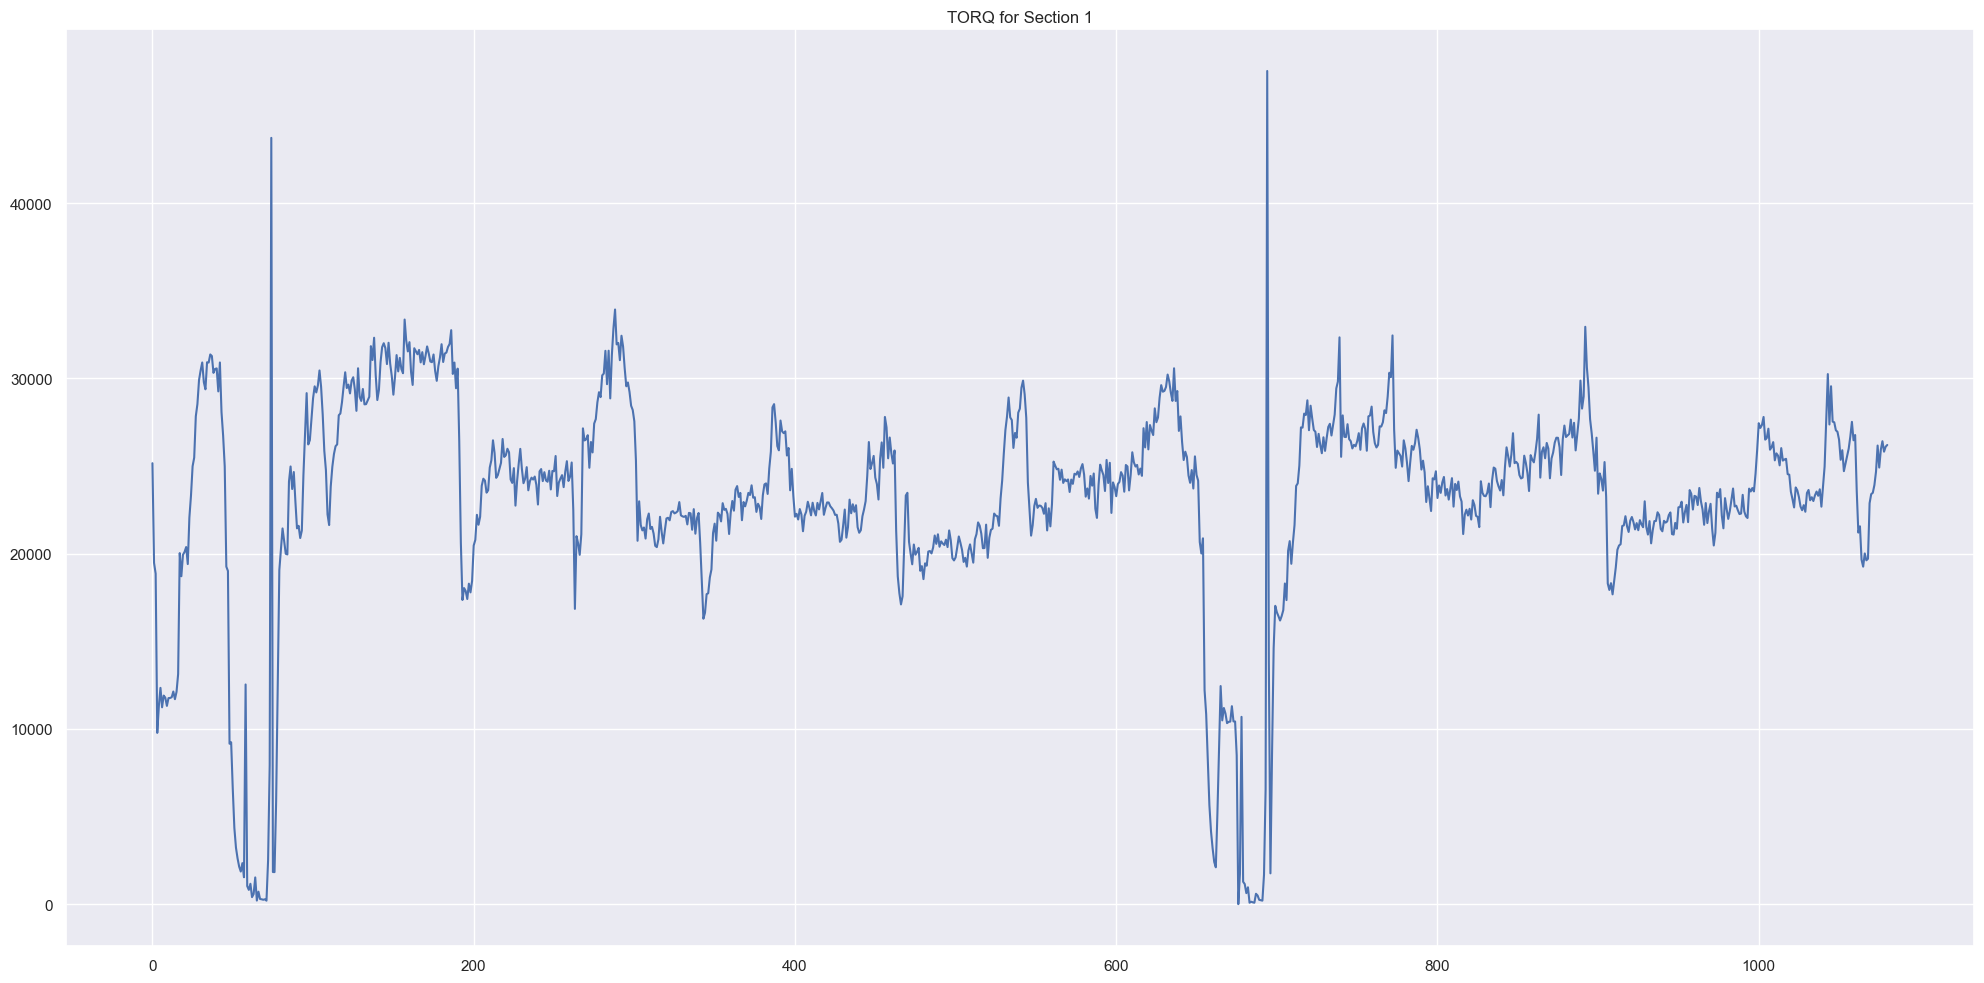

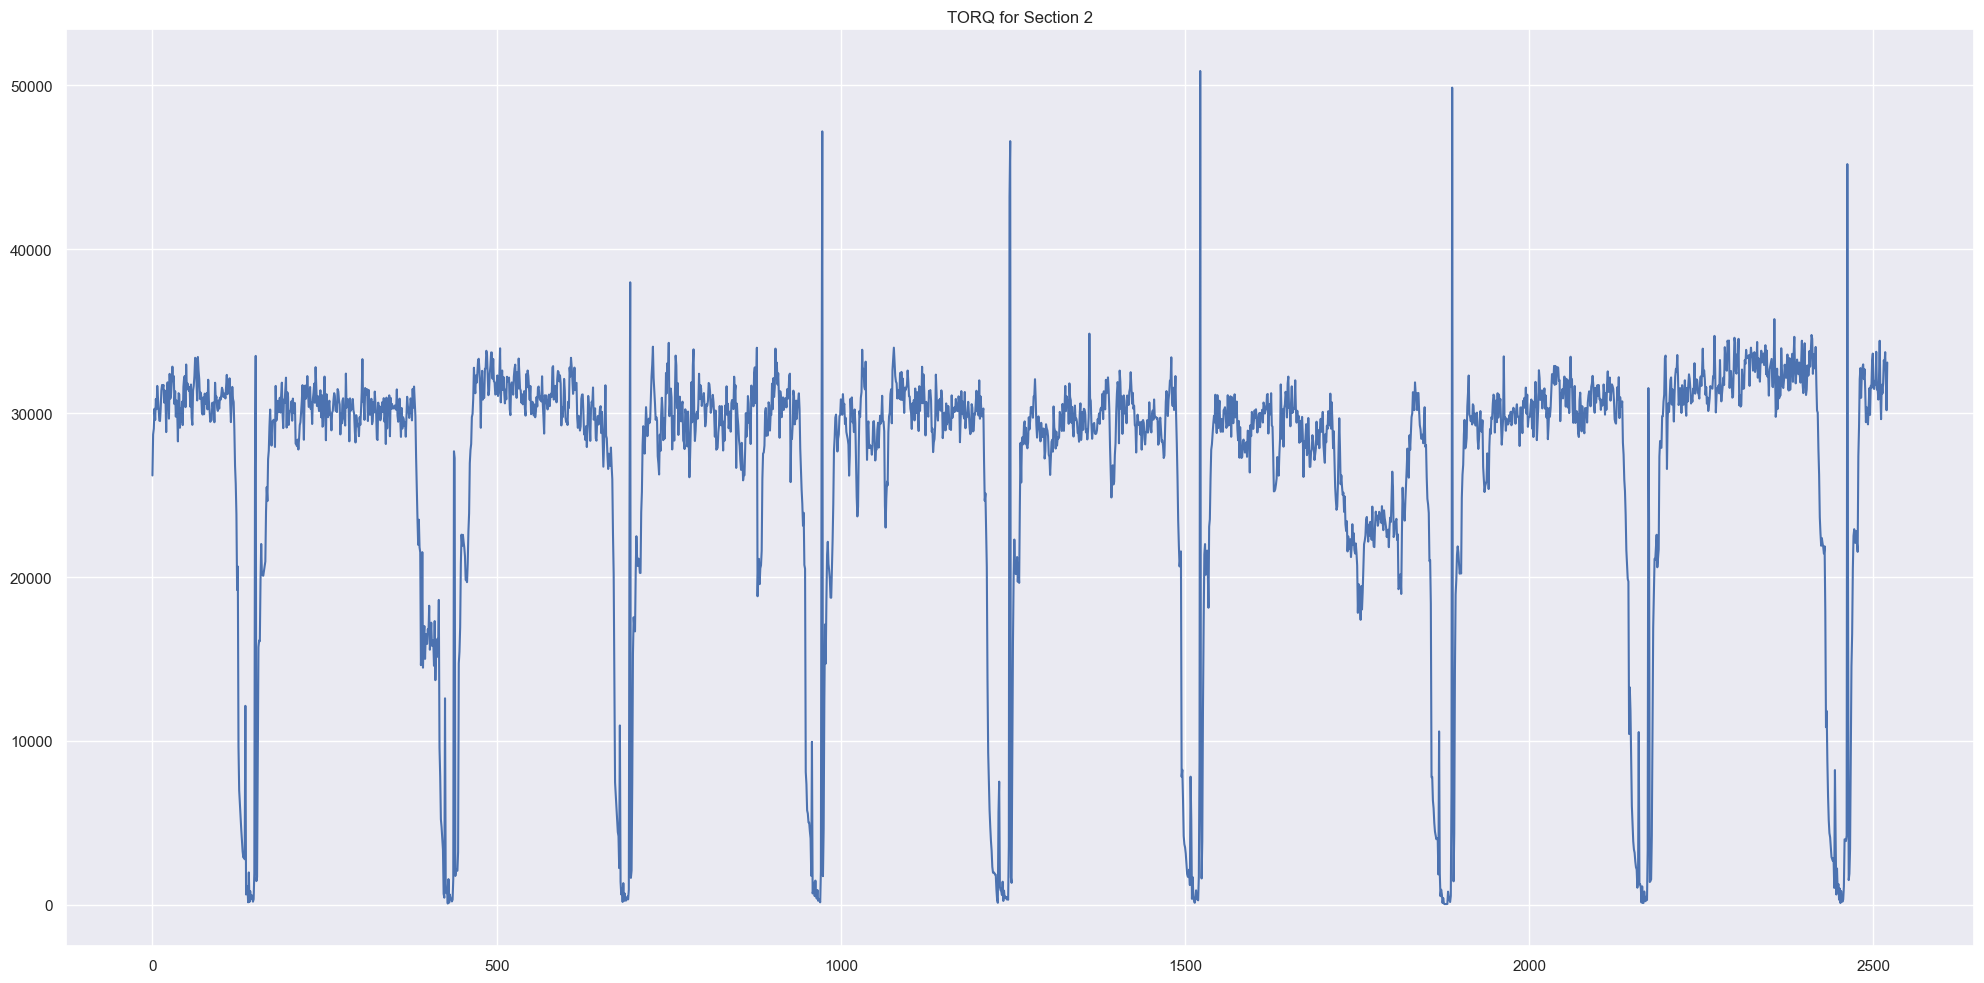

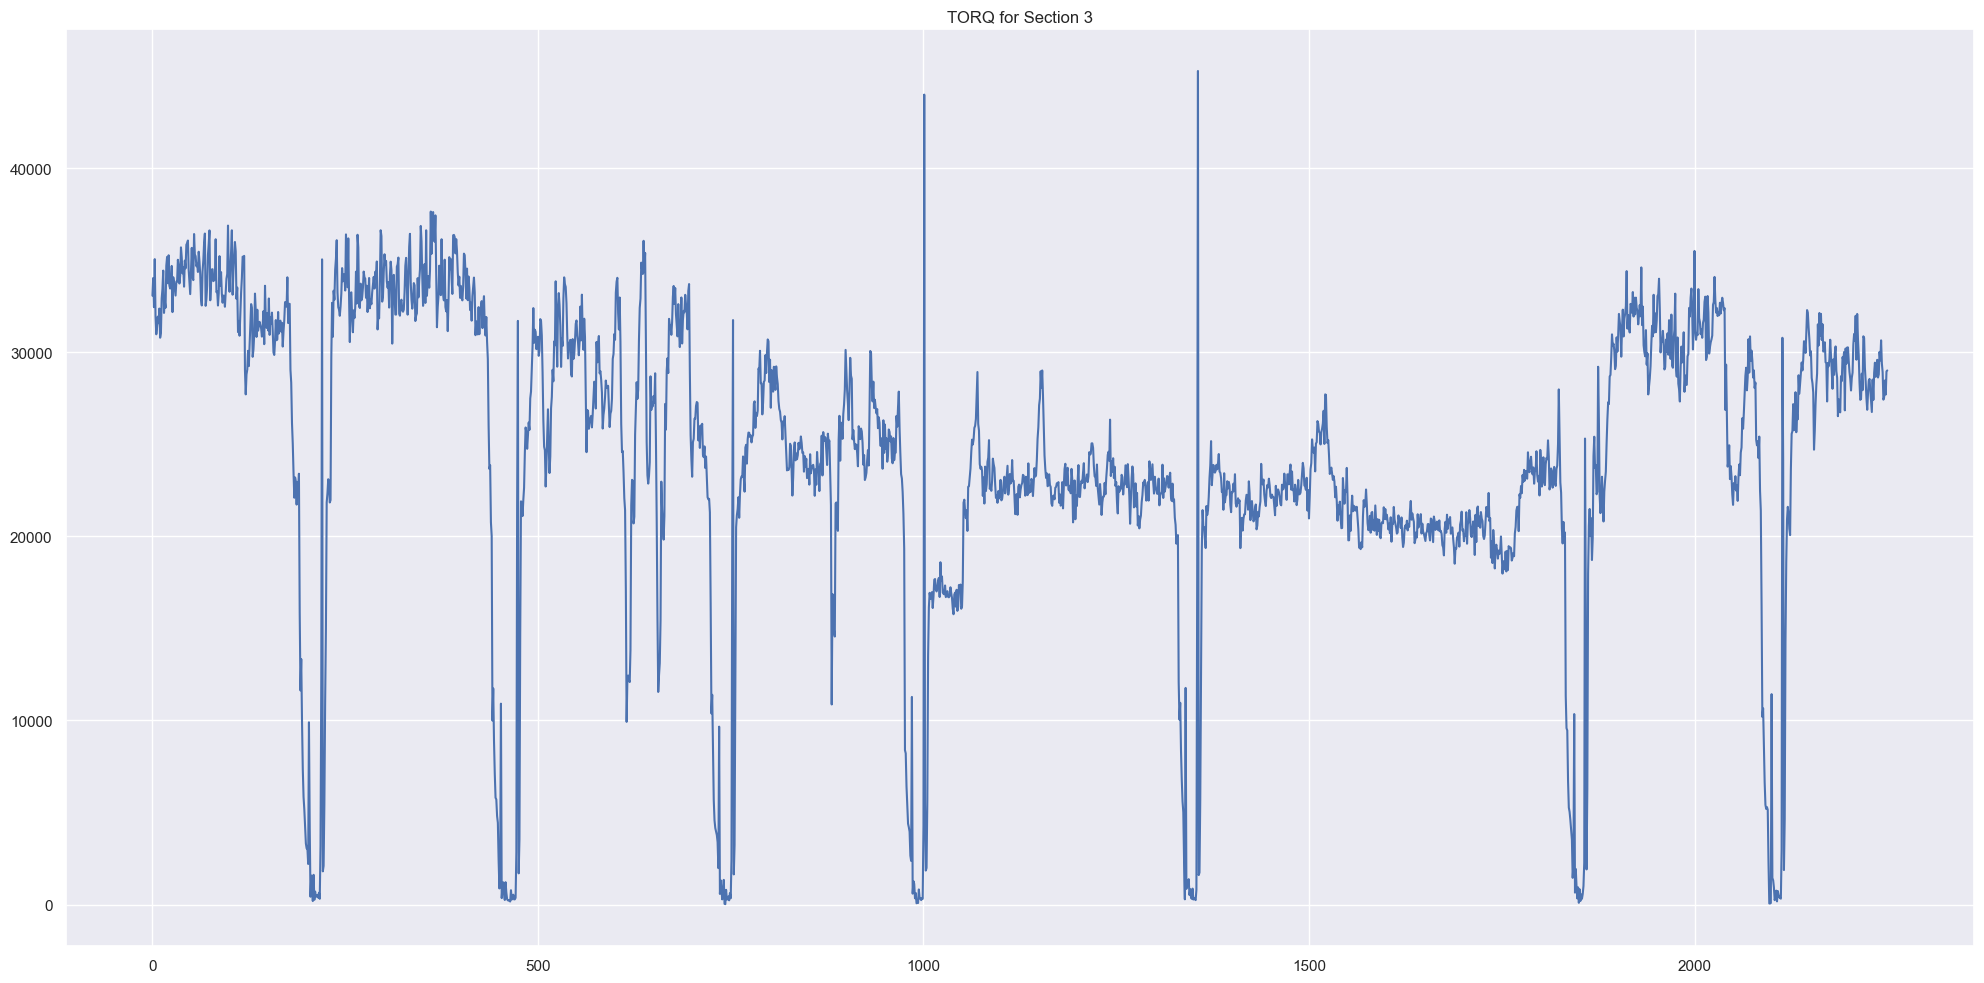

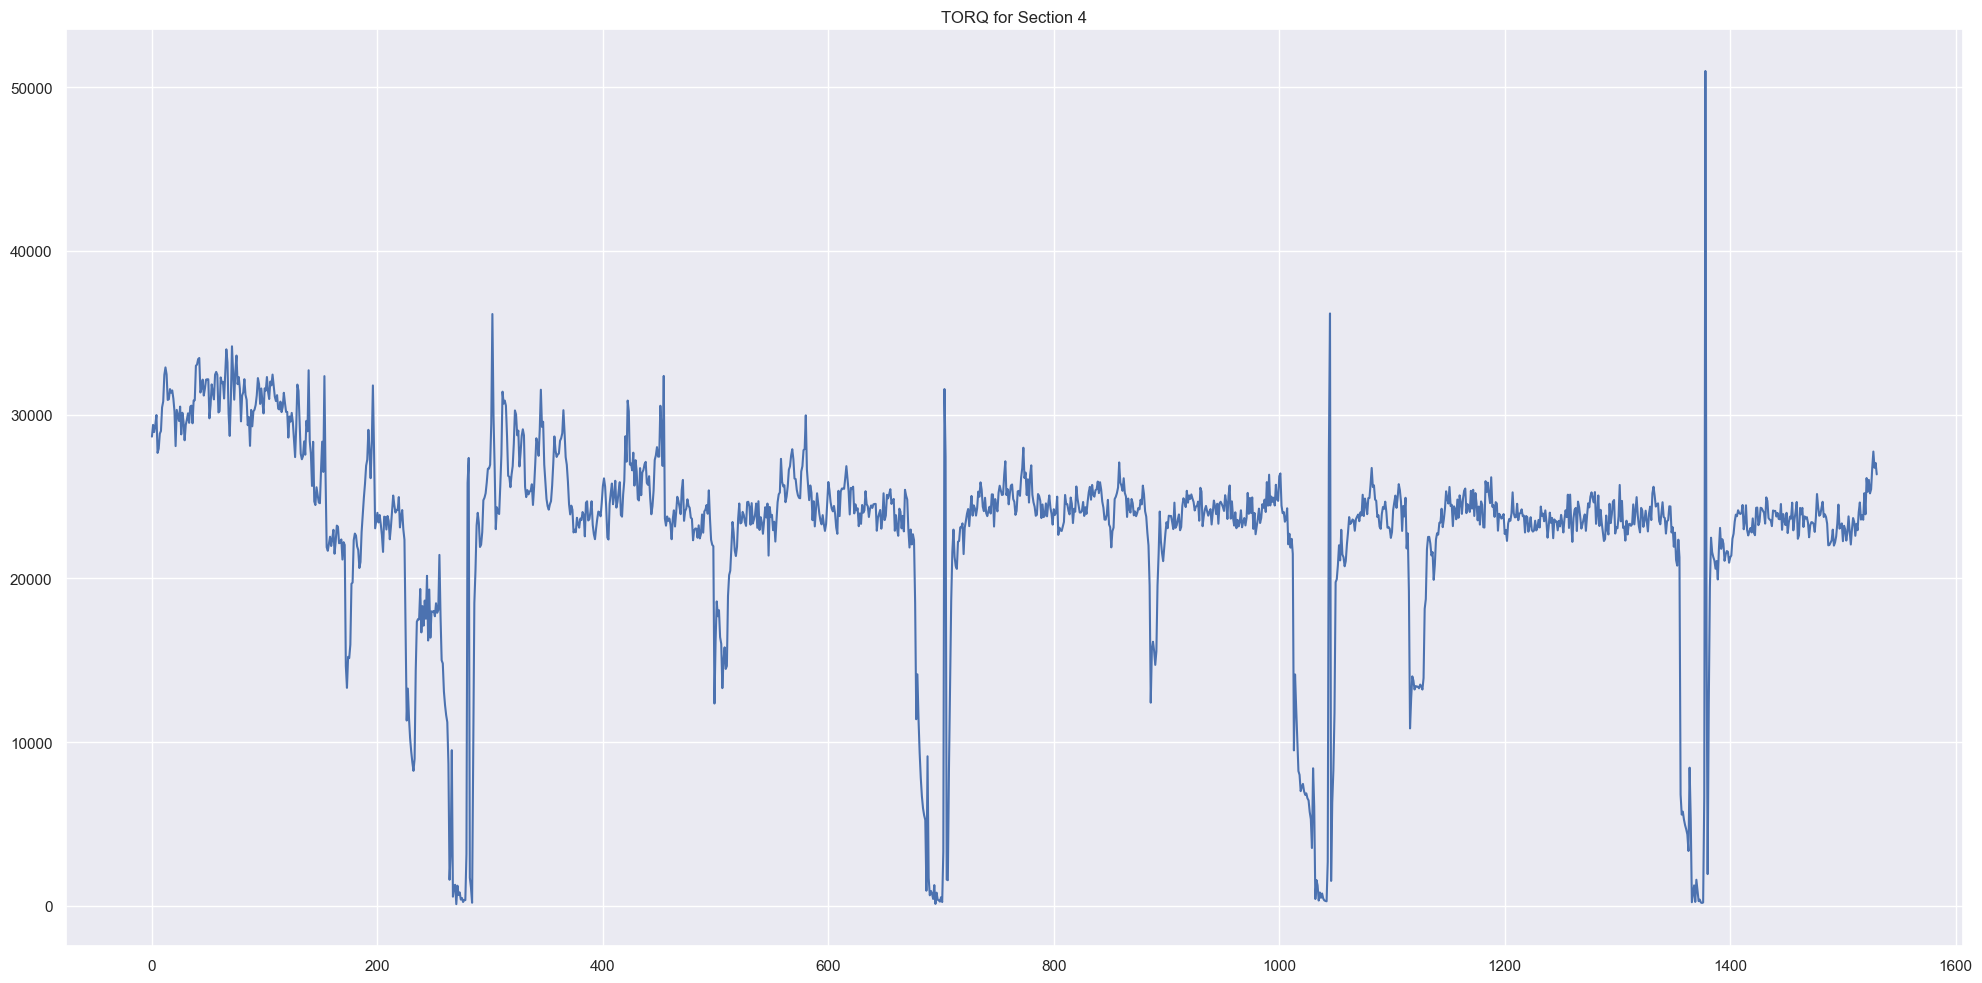

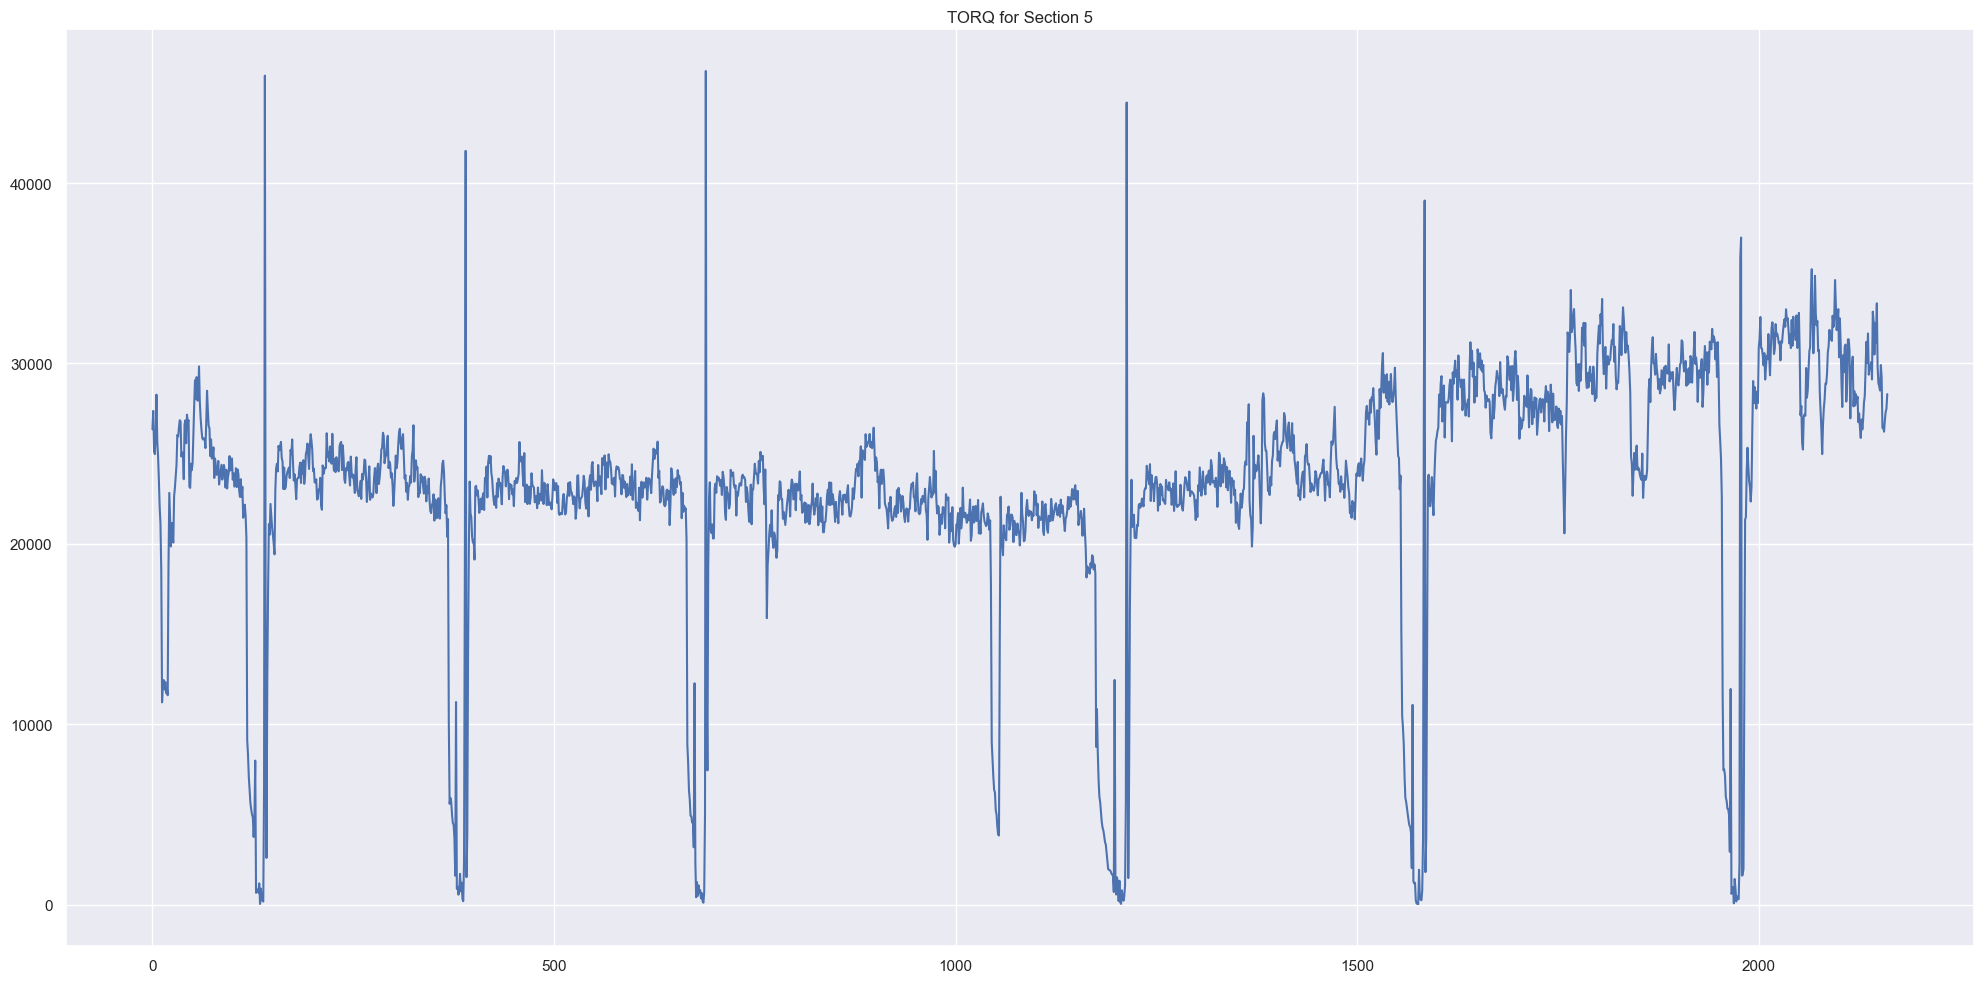

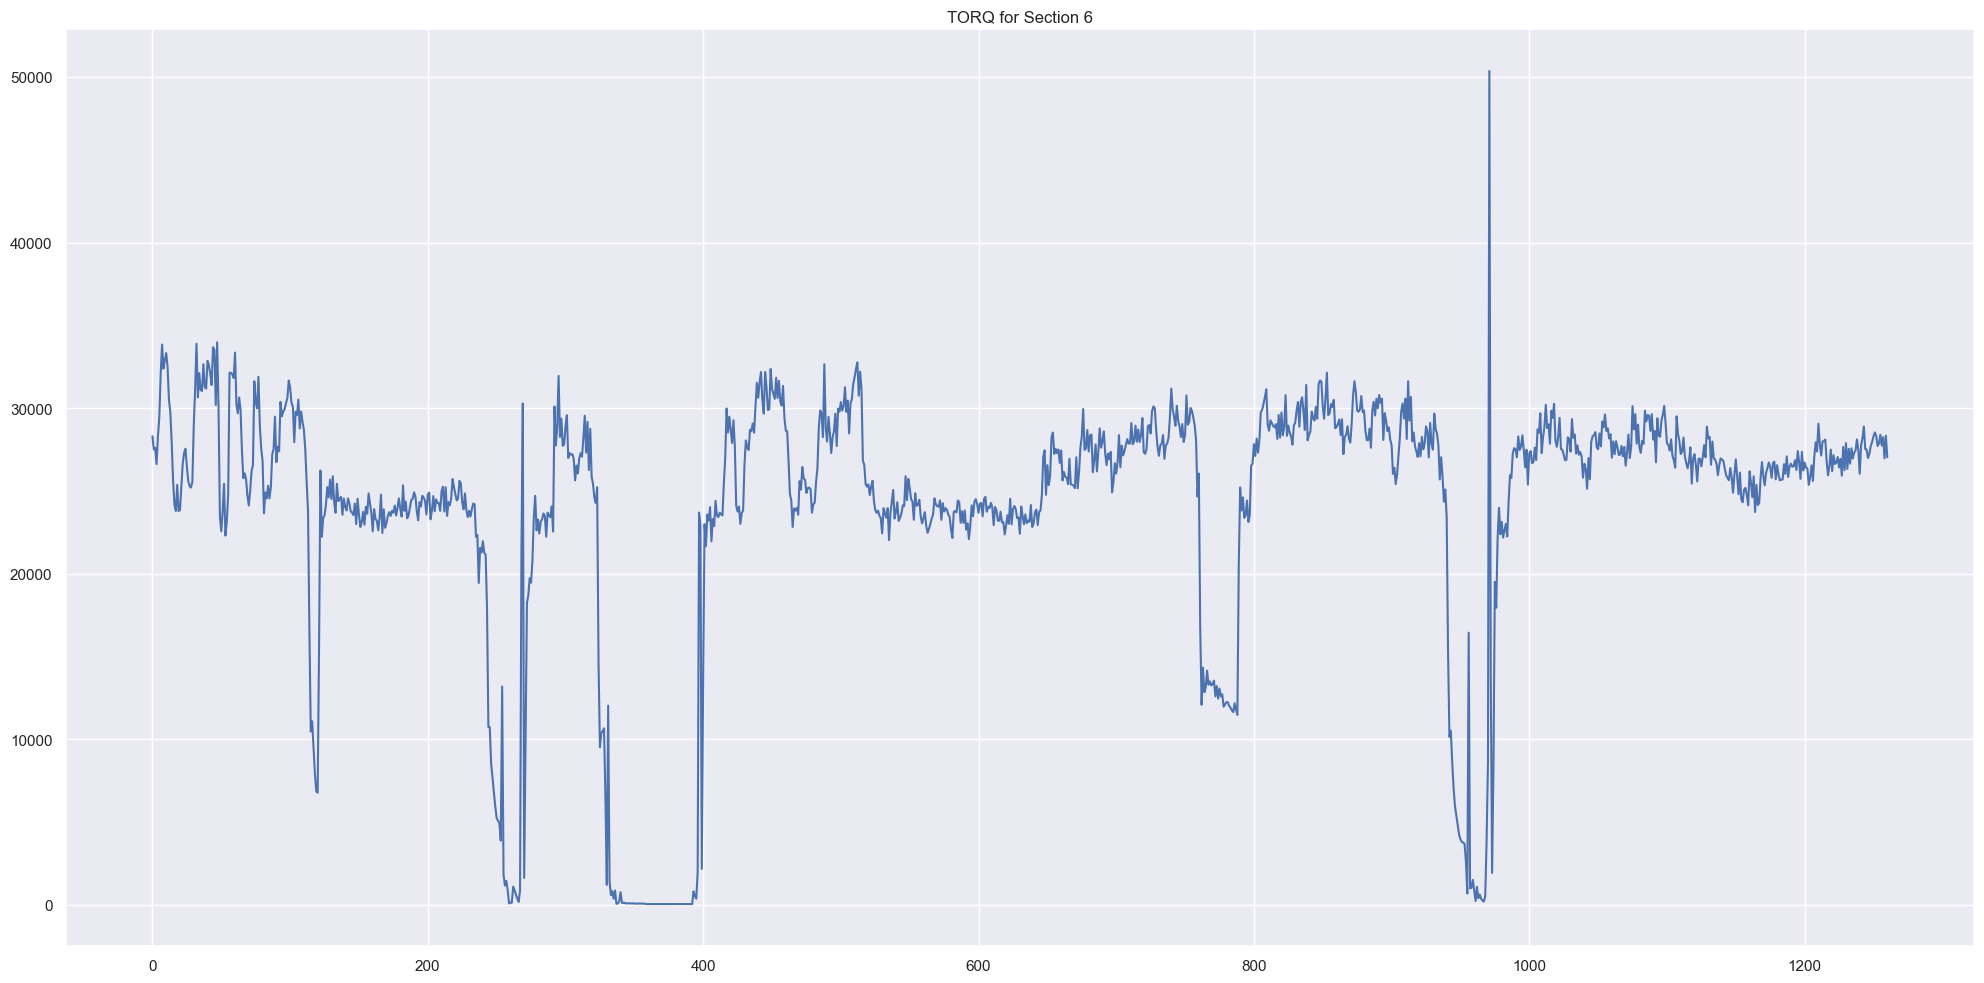

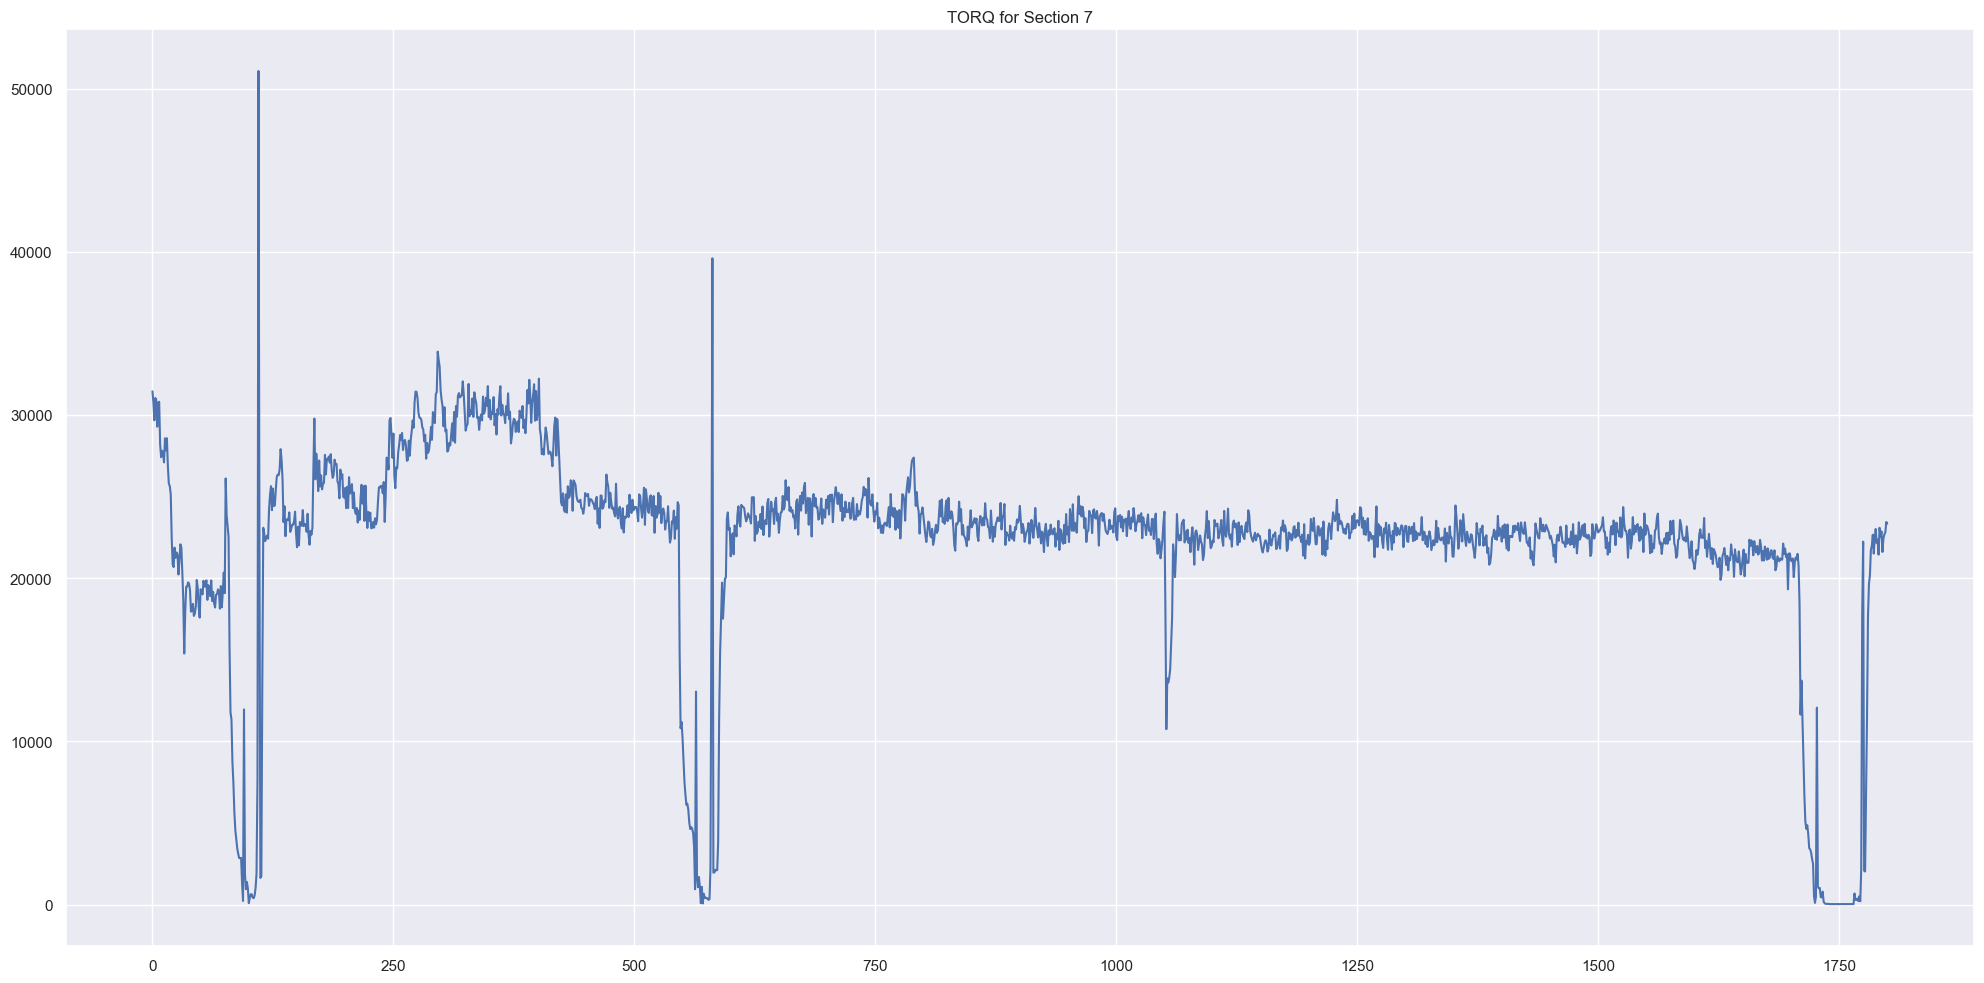

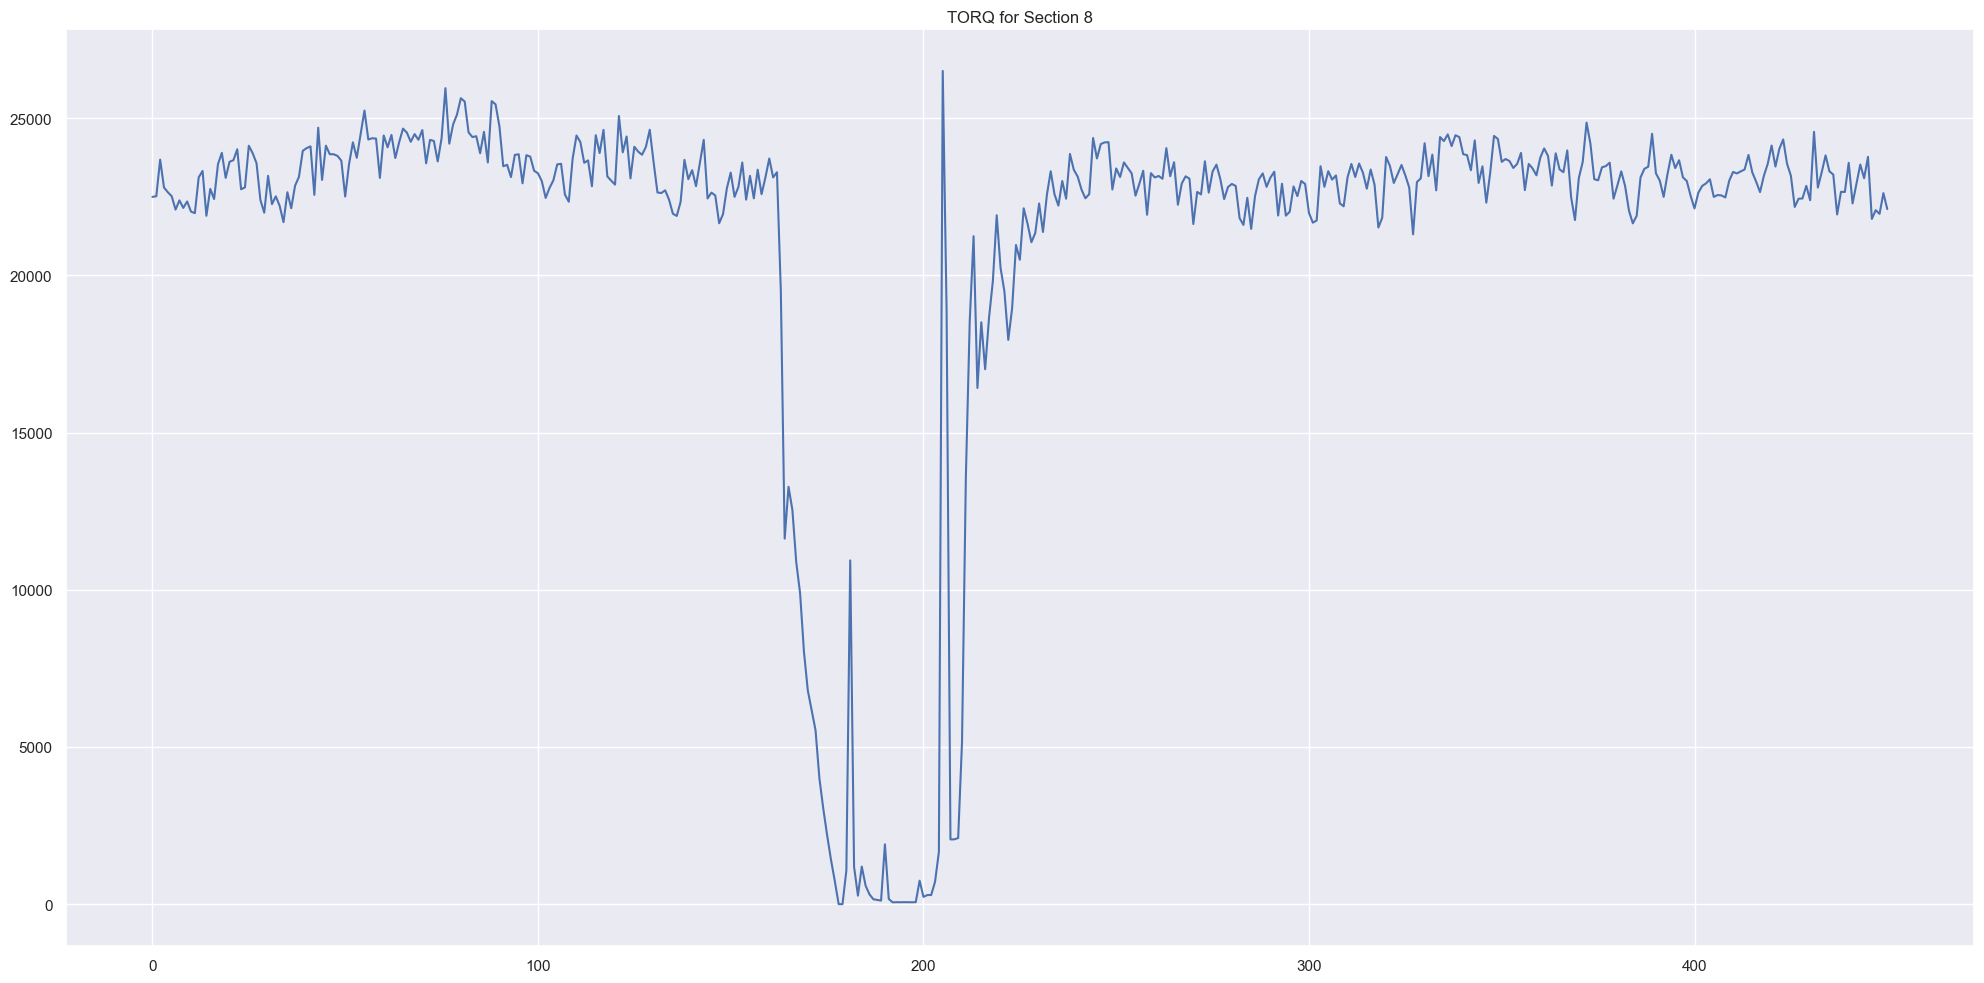

In [71]:
# plot_sections(dictionary_of_sections=dictionary_of_sections, variable="TaylAnn")
plot_sections(dictionary_of_sections=dictionary_of_sections_sensor, variable="TORQ")